## 1. Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The complete the analysis of what sorts of people were likely to survive and apply the tools of machine learning to predict which passengers survived the tragedy.

- Defining the problem statement
- Collecting the data
- Data analysis
- Data Visualization
- Feature engineering
- Modelling
- Testing


#### Goal

The goal of this project to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.

In [1]:
# import required libraries

# pandas for data loading and analysis
#numpy for mathematical operations
#for plotting matplolib and seaborn
#for modeling, evalution and prediction scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## 2. Dataset

The dataset can be acquired from this link https://www.kaggle.com/c/titanic, since i downloaded it already, i'm going to load it from local PC

In [2]:
#load dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df_train.append(df_test, ignore_index = True)

PassengerIDs = df_test['PassengerId']

/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


#### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  



## 3. Data Analysis

In [3]:
# head of data
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
# description of data
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


The statistics description of data above of numeric values of features telling the count, mean, standard deviation, minimum and maximum number of frequency of a feature. And it can be also seen that the Age and Survived count is less than as compared to other features.

In [5]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

From counts of Survived people data, it seems like that in our training set the people died in disaster are more
than the people survived

In [6]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

it looks like that there are more male passengers as compared to female passengers

In [7]:
# shape of training set consist of 891 rows and 12 columns
df_train.shape

(891, 12)

In [8]:
# shape of test set consist of 418 rows and 11 columns, it is goal to predict the survival of people so that's why
# the survival feature is not included in test set
df_test.shape

(418, 11)

In [9]:
# the shape of merged data of both train and test sets contains 1309 rows and 12 columns
df.shape

(1309, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


As seen the information of the dataset we've total 12 features including target feature 'Survived', the feature have total entries of 1309 but there are some feature with null or NaN values, if not handled they can become problem, but before handling the data. Let's understand the data.

## 4. Data Visualization

/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/raheel/anaconda3/envs/test/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


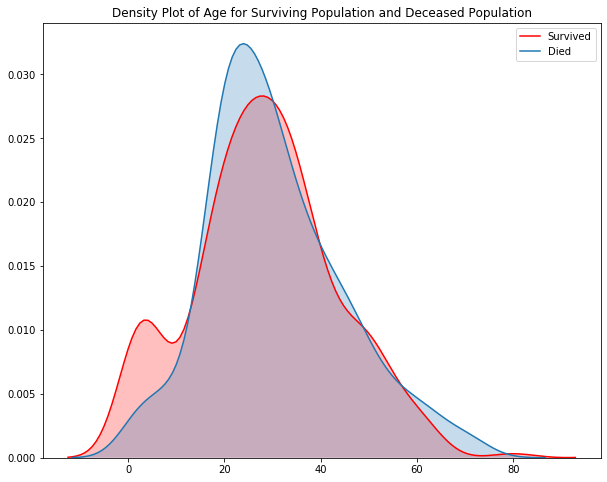

In [11]:
# we have seen that more people died than survived so let's visualize
plt.figure(figsize = (10,8))
sns.kdeplot(df['Age'][df.Survived == 1], shade = True, color = 'r')
sns.kdeplot(df['Age'][df.Survived == 0], shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

In [12]:
def barplot(x, y, title):
    sns.barplot(x = x, y = y)
    plt.title(title)

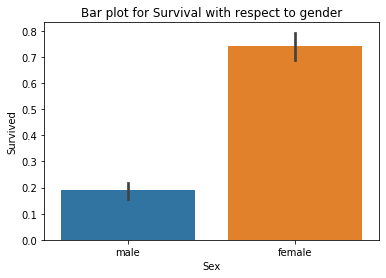

In [13]:
barplot(df['Sex'], df['Survived'], 'Bar plot for Survival with respect to gender')

The chart describes that women are more likely to survive that men

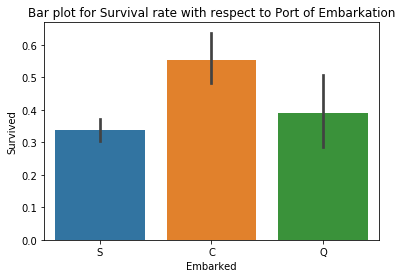

In [14]:
barplot(df['Embarked'], df['Survived'], 'Bar plot for Survival rate with respect to Port of Embarkation')

- The Chart confirms a person aboarded from C slightly more likely survived
- The Chart confirms a person aboarded from Q more likely dead
- The Chart confirms a person aboarded from S more likely dead

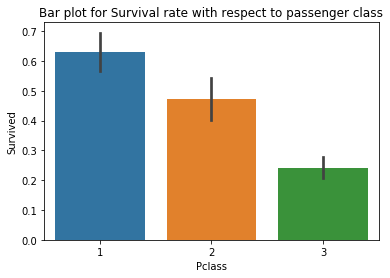

In [15]:
barplot(df['Pclass'], df['Survived'], 'Bar plot for Survival rate with respect to passenger class')

- The Chart confirms 1st class more likely survivied than other classes
- The Chart confirms 3rd class more likely dead than other classes

## 5. Feature Engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

We are not going to fill Survived feature values because that is our target to correctly predict missing values

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Feature Engineering Training Data

In [18]:
# handling missing values in training set
df_train.Age = df_train.Age.fillna(df.Age.median())
df_train.Cabin = df_train.Cabin.fillna('U')

most_embarked = df.Embarked.value_counts().index[0]
df_train.Embarked = df_train.Embarked.fillna(most_embarked)

In [19]:
# checking null values in training set
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#normalizing the name columns into a new title column
df_train['Title'] = df_train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
df_train.Title = df_train.Title.map(normalized_titles)
df_train.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [21]:
df_train.Sex = df_train.Sex.map({'female': 0, 'male': 1})
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train.Embarked = df_train.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
df_train.Title = df_train.Title.map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Officer': 4, 'Royalty': 5})

#### Feature Engineering Test Data

In [22]:
# handling missing values in test set
df_test.Age = df_test.Age.fillna(df.Age.median())
df_test.Cabin = df_test.Cabin.fillna('U')
df_test.Fare = df_test.Fare.fillna(df.Fare.median())

In [23]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
df_test['Title'] = df_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
df_test.Title = df_test.Title.map(normalized_titles)
df_test.Title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64

In [25]:
df_test.Sex = df_test.Sex.map({'female': 0, 'male': 1})
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test.Embarked = df_test.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
df_test.Title = df_test.Title.map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Officer': 4, 'Royalty': 5})

In [26]:
target = df_train['Survived']
train_data = df_train.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'], axis = 1)
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,22.0,7.2500,0,0,2
1,1,0,38.0,71.2833,1,2,2
2,3,0,26.0,7.9250,0,1,1
3,1,0,35.0,53.1000,0,2,2
4,3,1,35.0,8.0500,0,0,1


In [27]:
df_test = df_test.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Parch'], axis = 1)
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,34.5,7.8292,2,0,1
1,3,0,47.0,7.0000,0,2,2
2,2,1,62.0,9.6875,2,0,1
3,3,1,27.0,8.6625,0,0,1
4,3,0,22.0,12.2875,0,2,3


## 6. Modeling

In [28]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [29]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.74157303 0.62921348 0.6741573  0.75280899
 0.70786517 0.7752809  0.69662921 0.70786517]


In [30]:
round(np.mean(score)*100, 2)

72.83

In [31]:
clf = DecisionTreeClassifier(min_samples_leaf = 20, max_leaf_nodes = 7)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.76404494 0.79775281 0.82022472 0.83146067 0.79775281
 0.80898876 0.85393258 0.83146067 0.83146067]


In [32]:
round(np.mean(score)*100, 2)

81.48

In [33]:
Rclf = RandomForestClassifier(n_estimators = 100, max_depth = 11)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.76404494 0.79775281 0.82022472 0.83146067 0.79775281
 0.80898876 0.85393258 0.83146067 0.83146067]


In [34]:
round(np.mean(score)*100, 2)

81.48

In [35]:
clf = GradientBoostingClassifier(n_estimators = 60)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.80898876 0.80898876 0.84269663 0.86516854 0.82022472
 0.84269663 0.84269663 0.82022472 0.83146067]


In [36]:
round(np.mean(score)*100, 2)

83.05

## 7. Testing

In [38]:
Rclf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
prediction = Rclf.predict(df_test)

For submitting the project result to www.kaggle.com

In [ ]:
submission = pd.DataFrame({
        "PassengerId": PassengerIDs,
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()